In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')

In [5]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [9]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [10]:
df2[~df2.total_sqft.apply(is_float)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770
648,Arekere,9 Bedroom,4125Perch,9.0,265.000
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000


In [11]:
def avg_of_tsqft(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [12]:
df3 = df2.copy()

In [13]:
df3.total_sqft = df3.total_sqft.apply(avg_of_tsqft)

In [14]:
df3.head(20)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,51.00
5,Whitefield,2 BHK,1170.0,2.0,38.00
6,Old Airport Road,4 BHK,2732.0,4.0,204.00
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00
8,Marathahalli,3 BHK,1310.0,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00


In [15]:
df3.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [16]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000


In [17]:
len(df4.location.unique())

1304

In [18]:
df4.location = df4.location.apply(lambda x: x.strip())
df4

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,10407.336319


In [19]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [20]:
len(location_stats[location_stats<=10])

1052

In [21]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [22]:
len(df4.location.unique())

1293

In [23]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [24]:
df4.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000


In [25]:
df4['bhk'] = df4['size'].apply(lambda x: float(x.split(' ')[0]))

In [26]:
df4.shape

(13246, 7)

In [27]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]

In [28]:
df5.shape

(12502, 7)

In [29]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [30]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st)) ]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(10241, 7)

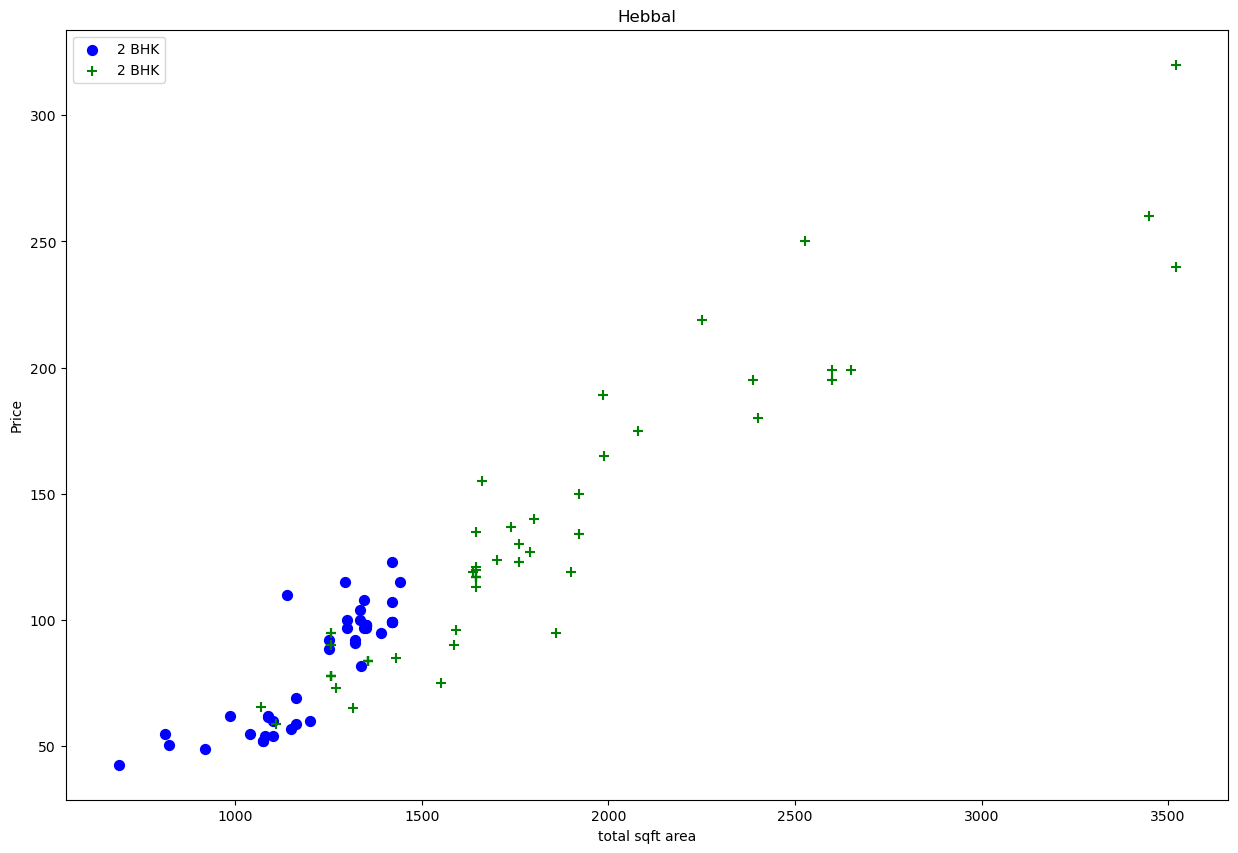

In [31]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='2 BHK',s=50)
    plt.xlabel('total sqft area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6,"Hebbal")
    

In [32]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape

(7329, 7)

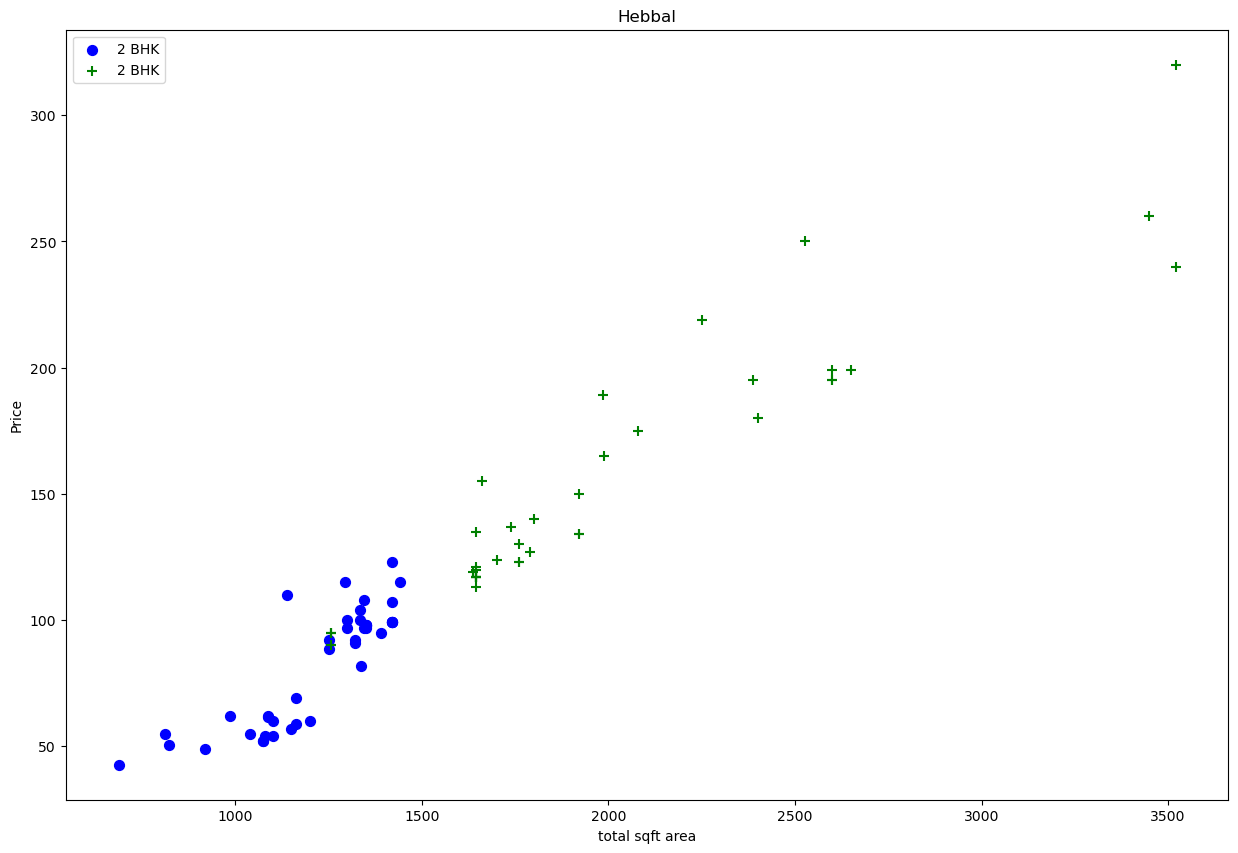

In [33]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'Count')

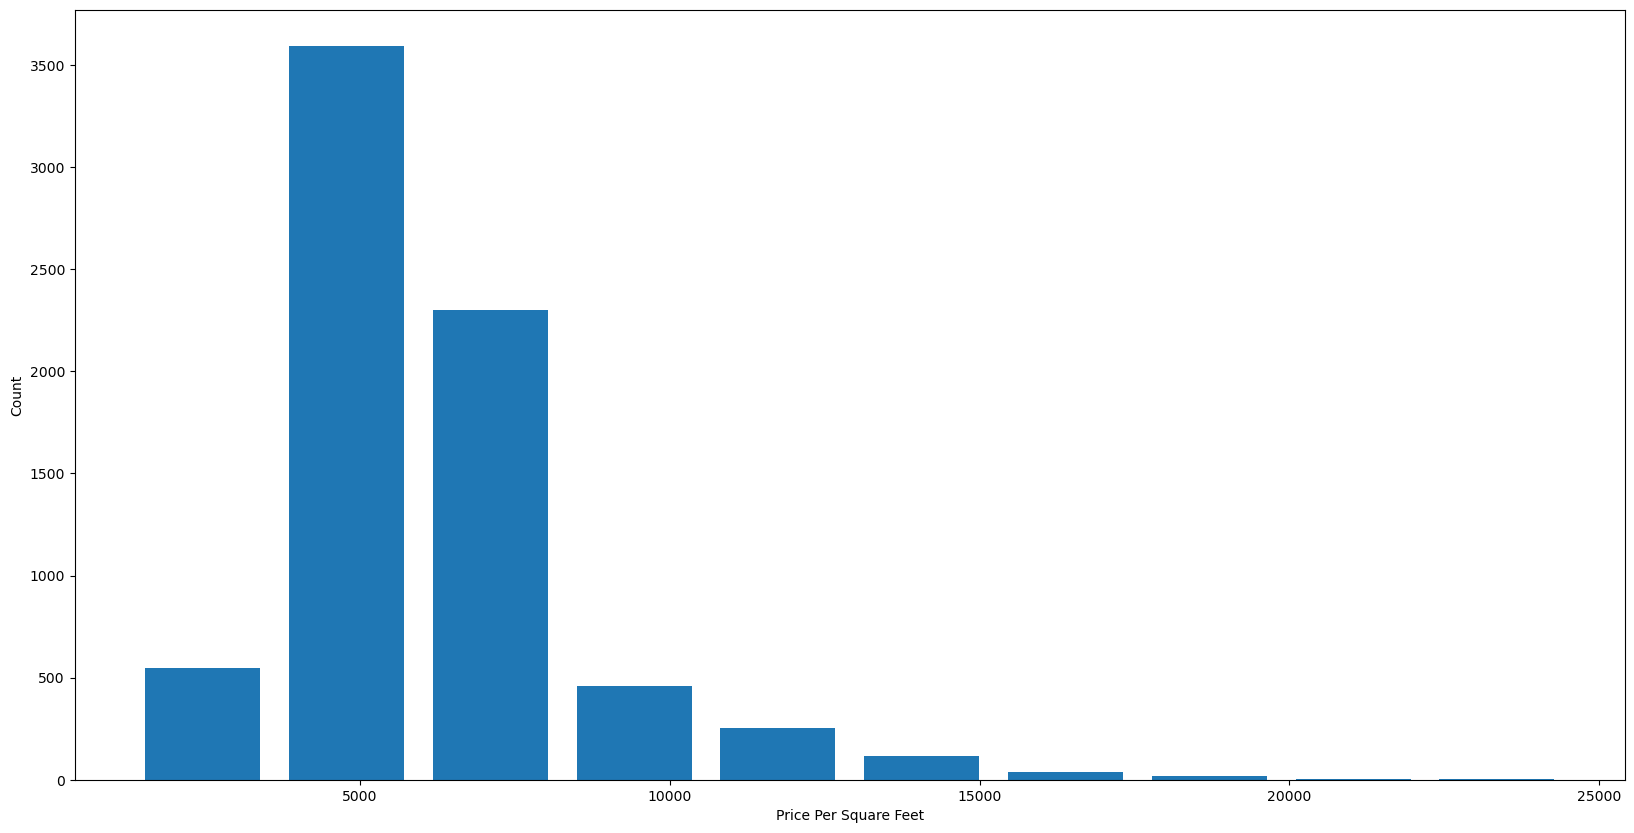

In [34]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [35]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

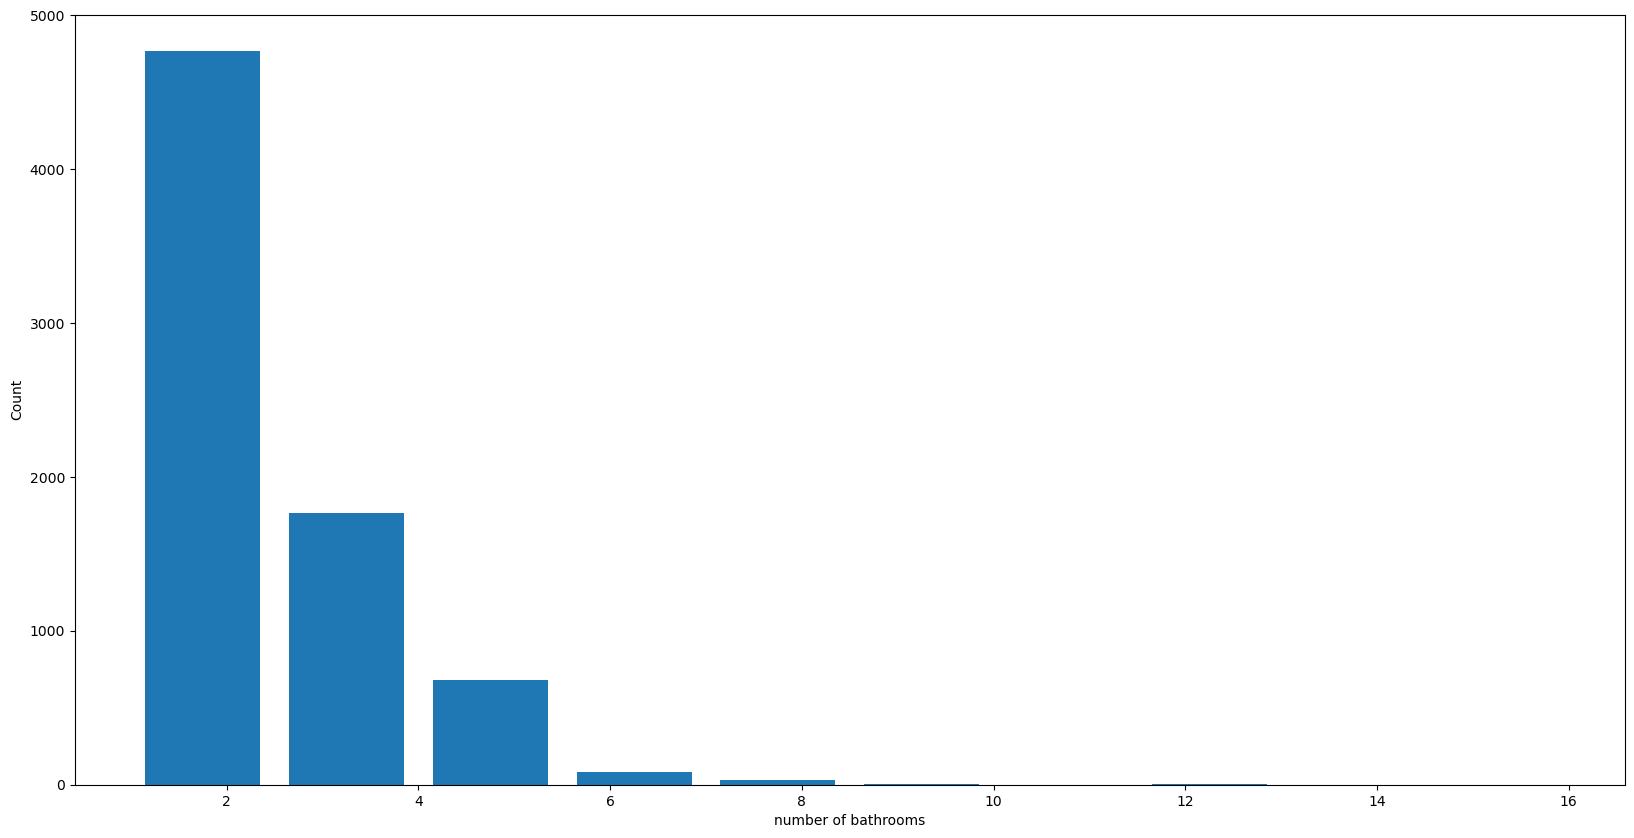

In [36]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("Count")

In [37]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7251, 7)

In [38]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0


In [39]:
dummies = pd.get_dummies(df9.location,dtype=int)

In [40]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')], axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df11 = df10.drop('location', axis='columns')
df11.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df11.shape

(7251, 245)

In [43]:
x = df11.drop('price', axis='columns')
x.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y = df11.price 
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [143]:
x=x.drop('4',axis='columns')

In [144]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [145]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [164]:
len(x.columns)

244

In [146]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)
x.columns = x.columns.astype(str)


In [147]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8452277697874391

In [148]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score 

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.84522777, 0.80004632, 0.88682995, 0.842265  , 0.86250633])

In [149]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

c:\Users\Ugyen Wangchuk\anaconda3\Library\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ugyen Wangchuk\anaconda3\Library\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ugyen Wangchuk\anaconda3\Library\anaconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Ugyen Wangchuk\anaconda3\Library\anaconda\Lib\site-packages\sklearn\base.py", line 666, in 

,model,best_score,best_params
0,linear_regression,0.818354,{'positive': False}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.723214,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [158]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr_clf.predict([X])[0]

In [159]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\Ugyen Wangchuk\anaconda3\Library\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677211362

In [160]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\Users\Ugyen Wangchuk\anaconda3\Library\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395238173

In [161]:
predict_price('Indira Nagar',1000, 2, 2)

c:\Users\Ugyen Wangchuk\anaconda3\Library\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006294

In [162]:
predict_price('Indira Nagar',1000, 3, 3)

c:\Users\Ugyen Wangchuk\anaconda3\Library\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033105

In [166]:
import pickle 
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)


In [168]:
import json 
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))